In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.19.0


In [ ]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)


Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

print("Min value:", X_train.min())
print("Max value:", X_train.max())

Min value: 0.0
Max value: 1.0


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Create model
model = Sequential()

# Input layer
model.add(Flatten(input_shape=(28, 28)))
# Hidden layers
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
# Output layer
model.add(Dense(10, activation='softmax'))

# Compile model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("Model created and compiled successfully ✅")


Model created and compiled successfully ✅


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Train the model
history = model.fit(
    X_train,
    y_train,
    epochs=3,
    validation_data=(X_test, y_test)
)

print("Training completed ✅")


Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8800 - loss: 0.4094 - val_accuracy: 0.9606 - val_loss: 0.1262
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9688 - loss: 0.1027 - val_accuracy: 0.9670 - val_loss: 0.1033
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9789 - loss: 0.0691 - val_accuracy: 0.9747 - val_loss: 0.0799
Training completed ✅


In [ ]:
# Evaluate model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9717 - loss: 0.0923
Test Loss: 0.0798664540052414
Test Accuracy: 0.9746999740600586


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


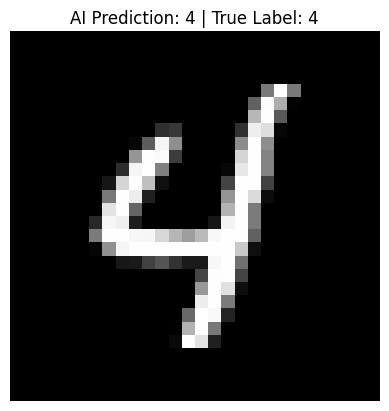

AI predicted: 4
Actual number: 4


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

index = np.random.randint(0, len(X_test))

image = X_test[index]
true_label = y_test[index]

prediction = model.predict(image.reshape(1, 28, 28))
predicted_label = np.argmax(prediction)

plt.imshow(image, cmap='gray')
plt.title(f"AI Prediction: {predicted_label} | True Label: {true_label}")
plt.axis('off')
plt.show()

print("AI predicted:", predicted_label)
print("Actual number:", true_label)


In [ ]:
from google.colab import files

uploaded = files.upload()


Saving images.jpg to images (1).jpg


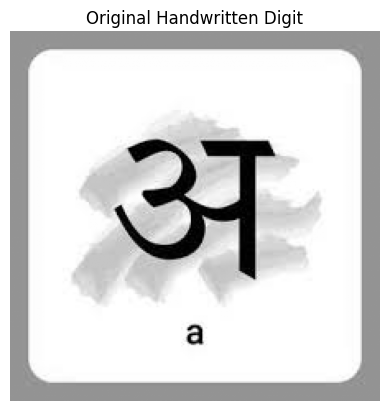

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("images.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')
plt.title("Original Handwritten Digit")
plt.axis('off')
plt.show()


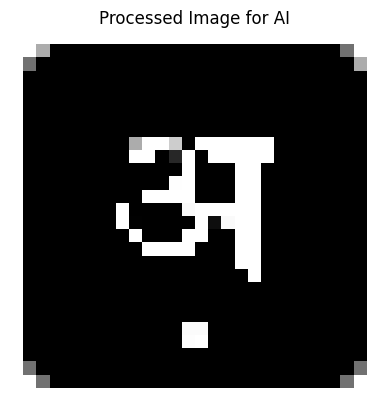

In [ ]:
import numpy as np

img = cv2.GaussianBlur(img, (5,5), 0)                              # Blur noise

_, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

img = cv2.resize(img, (28, 28))

img = np.invert(img)

img = img / 255.0

img = img.reshape(1, 28, 28)

plt.imshow(img[0], cmap='gray')
plt.title("Processed Image for AI")
plt.axis('off')
plt.show()


In [ ]:
prediction = model.predict(img)
predicted_digit = np.argmax(prediction)

print("🧠 AI Prediction:", predicted_digit)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
🧠 AI Prediction: 7
